In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/PhishTank/Base_classifier_result(pre URL cross).csv")
data

,labels,dt_prediction_non,dt_prediction_phish,knn_prediction_non,knn_prediction_phish,XGB_prediction_non,XGB_prediction_phish
0,0,0.974689,0.025311,1.000000,0.000000,0.996783,0.003217
1,0,0.974689,0.025311,1.000000,0.000000,0.994246,0.005754
2,1,0.067114,0.932886,0.857143,0.142857,0.518307,0.481693
3,1,0.000000,1.000000,0.000000,1.000000,0.000809,0.999191
4,1,0.000000,1.000000,0.000000,1.000000,0.000622,0.999378
...,...,...,...,...,...,...,...
4647,0,0.974689,0.025311,1.000000,0.000000,0.992907,0.007093
4648,0,0.974689,0.025311,1.000000,0.000000,0.993572,0.006428
4649,0,0.974689,0.025311,1.000000,0.000000,0.989556,0.010444
4650,1,0.000000,1.000000,0.000000,1.000000,0.006592,0.993408


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4652 entries, 0 to 4651
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   labels                4652 non-null   int64  
 1   dt_prediction_non     4652 non-null   float64
 2   dt_prediction_phish   4652 non-null   float64
 3   knn_prediction_non    4652 non-null   float64
 4   knn_prediction_phish  4652 non-null   float64
 5   XGB_prediction_non    4652 non-null   float64
 6   XGB_prediction_phish  4652 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 254.5 KB


In [5]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(4652, 6) (4652,)


In [6]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


def model_aa(x_train, x_val, y_train, y_val, opt, early_stopping_monitor):

  n_cols = x_train.shape[1]
  # print("check point")
  #create model
  model = Sequential()
  model.add(Dense(30, activation='relu', input_shape=(n_cols,)))
  model.add(Dense(10, activation='relu'))

  model.add(Dense(1, activation = 'sigmoid'))
  # softmax
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  print(cm)
  print('Precision: %.4f' % precision_score(y_val, y_pred))
  print('Recall: %.4f' % recall_score(y_val, y_pred))
  print('F1 Score: %.4f' % f1_score(y_val, y_pred))
  
  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.4228 - accuracy: 0.9498 - val_loss: 0.2366 - val_accuracy: 0.9785
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.1480 - accuracy: 0.9809 - val_loss: 0.0842 - val_accuracy: 0.9871
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0691 - accuracy: 0.9852 - val_loss: 0.0496 - val_accuracy: 0.9871
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9861 - val_loss: 0.0420 - val_accuracy: 0.9871
Epoch 5/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0380 - val_accuracy: 0.9871
Epoch 6/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9861 - val_loss: 0.0371 - val_accuracy: 0.9871
Epoch 7/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9857 - val_loss: 0.0361 - val_accuracy: 0.9871

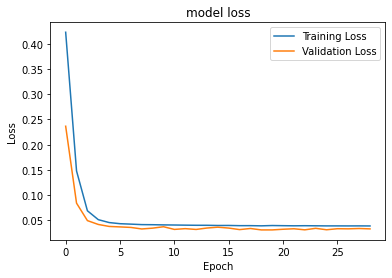

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       274
           1       0.97      1.00      0.98       192

    accuracy                           0.99       466
   macro avg       0.98      0.99      0.99       466
weighted avg       0.99      0.99      0.99       466

Accuracy: 0.9871244635193133
[[268   6]
 [  0 192]]
Precision: 0.9697
Recall: 1.0000
F1 Score: 0.9846
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2841 - accuracy: 0.9090 - val_loss: 0.0674 - val_accuracy: 0.9850
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9861 - val_loss: 0.0495 - val_accuracy: 0.9850
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9859 - val_loss: 0.0464 - val_accuracy: 0.9828
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0392 - accuracy: 0.9861 - val_loss: 0.0452 

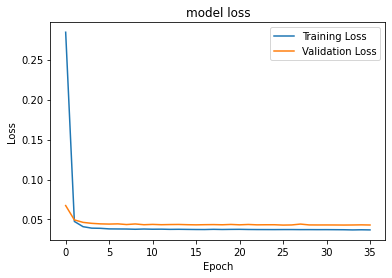

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       258
           1       0.98      0.99      0.98       208

    accuracy                           0.98       466
   macro avg       0.98      0.98      0.98       466
weighted avg       0.98      0.98      0.98       466

Accuracy: 0.9828326180257511
[[253   5]
 [  3 205]]
Precision: 0.9762
Recall: 0.9856
F1 Score: 0.9809
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1578 - accuracy: 0.9859 - val_loss: 0.0492 - val_accuracy: 0.9828
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0428 - accuracy: 0.9871 - val_loss: 0.0452 - val_accuracy: 0.9849
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0401 - accuracy: 0.9859 - val_loss: 0.0458 - val_accuracy: 0.9828
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9866 - val_loss: 0.0457 

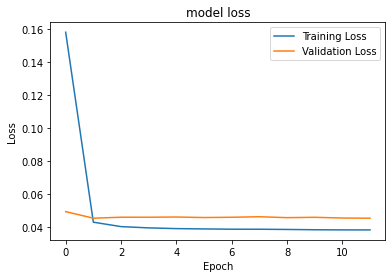

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       277
           1       0.98      0.98      0.98       188

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465

Accuracy: 0.9827956989247312
[[273   4]
 [  4 184]]
Precision: 0.9787
Recall: 0.9787
F1 Score: 0.9787
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.2105 - accuracy: 0.9642 - val_loss: 0.0589 - val_accuracy: 0.9849
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.0524 - val_accuracy: 0.9849
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9866 - val_loss: 0.0519 - val_accuracy: 0.9849
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9852 - val_loss: 0.0511 

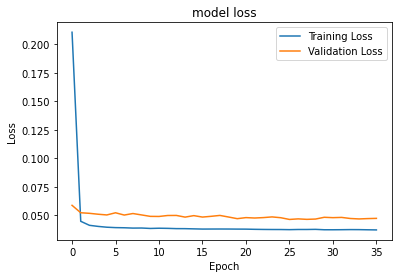

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       255
           1       1.00      0.98      0.99       210

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465

Accuracy: 0.989247311827957
[[254   1]
 [  4 206]]
Precision: 0.9952
Recall: 0.9810
F1 Score: 0.9880
Epoch 1/100
131/131 [==============================] - 1s 5ms/step - loss: 0.1325 - accuracy: 0.9752 - val_loss: 0.0595 - val_accuracy: 0.9828
Epoch 2/100
131/131 [==============================] - 1s 5ms/step - loss: 0.0434 - accuracy: 0.9861 - val_loss: 0.0536 - val_accuracy: 0.9849
Epoch 3/100
131/131 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9857 - val_loss: 0.0529 - val_accuracy: 0.9849
Epoch 4/100
131/131 [==============================] - 1s 7ms/step - loss: 0.0393 - accuracy: 0.9859 - val_loss: 0.0509 -

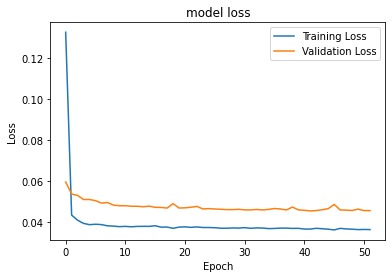

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       256
           1       0.99      0.99      0.99       209

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465

Accuracy: 0.9870967741935484
[[253   3]
 [  3 206]]
Precision: 0.9856
Recall: 0.9856
F1 Score: 0.9856
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1785 - accuracy: 0.9487 - val_loss: 0.0307 - val_accuracy: 0.9892
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 0.9857 - val_loss: 0.0248 - val_accuracy: 0.9935
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9854 - val_loss: 0.0224 - val_accuracy: 0.9914
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0423 - accuracy: 0.9850 - val_loss: 0.0219 

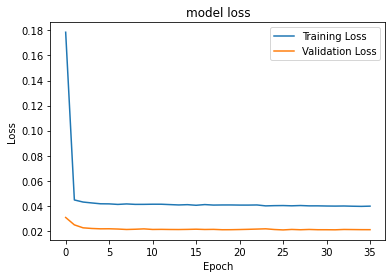

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       267
           1       0.99      0.99      0.99       198

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465

Accuracy: 0.9935483870967742
[[266   1]
 [  2 196]]
Precision: 0.9949
Recall: 0.9899
F1 Score: 0.9924
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1491 - accuracy: 0.9833 - val_loss: 0.0505 - val_accuracy: 0.9828
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9852 - val_loss: 0.0439 - val_accuracy: 0.9849
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9861 - val_loss: 0.0432 - val_accuracy: 0.9806
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9859 - val_loss: 0.0434 

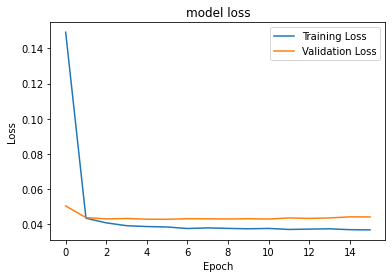

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       262
           1       0.98      0.99      0.98       203

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465

Accuracy: 0.9827956989247312
[[257   5]
 [  3 200]]
Precision: 0.9756
Recall: 0.9852
F1 Score: 0.9804
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.1246 - accuracy: 0.9670 - val_loss: 0.0313 - val_accuracy: 0.9892
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9854 - val_loss: 0.0314 - val_accuracy: 0.9892
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9852 - val_loss: 0.0292 - val_accuracy: 0.9892
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.9854 - val_loss: 0.0275 

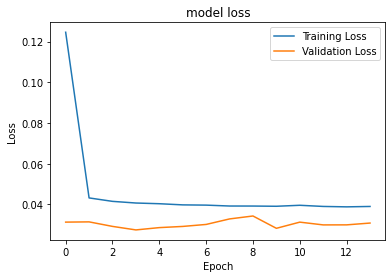

Validation Accuracy: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       268
           1       0.97      1.00      0.98       197

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465

Accuracy: 0.9870967741935484
[[262   6]
 [  0 197]]
Precision: 0.9704
Recall: 1.0000
F1 Score: 0.9850
Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 0.3180 - accuracy: 0.9214 - val_loss: 0.0749 - val_accuracy: 0.9849
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9852 - val_loss: 0.0411 - val_accuracy: 0.9849
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9859 - val_loss: 0.0357 - val_accuracy: 0.9871
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9871 - val_loss: 0.0326 

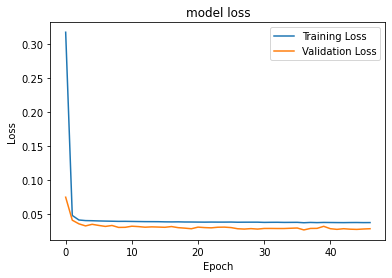

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       254
           1       0.99      0.98      0.99       211

    accuracy                           0.99       465
   macro avg       0.99      0.99      0.99       465
weighted avg       0.99      0.99      0.99       465

Accuracy: 0.9870967741935484
[[252   2]
 [  4 207]]
Precision: 0.9904
Recall: 0.9810
F1 Score: 0.9857
Epoch 1/100
131/131 [==============================] - 1s 4ms/step - loss: 0.1976 - accuracy: 0.9561 - val_loss: 0.0539 - val_accuracy: 0.9828
Epoch 2/100
131/131 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9871 - val_loss: 0.0500 - val_accuracy: 0.9828
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9871 - val_loss: 0.0461 - val_accuracy: 0.9849
Epoch 4/100
131/131 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9866 - val_loss: 0.0475 

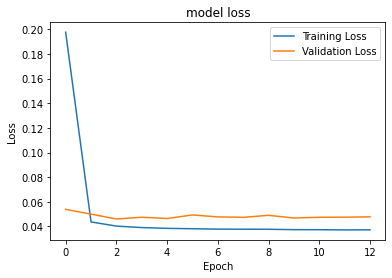

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       265
           1       0.98      0.97      0.98       200

    accuracy                           0.98       465
   macro avg       0.98      0.98      0.98       465
weighted avg       0.98      0.98      0.98       465

Accuracy: 0.9827956989247312
[[262   3]
 [  5 195]]
Precision: 0.9848
Recall: 0.9750
F1 Score: 0.9799
Average Validation Accuracy: 0.9862430199824633


In [7]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0
kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1, early_stopping_monitor)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

